In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
wdata = pd.read_excel('../DataPreProcessing/wdata.xlsx')

In [4]:
df = pd.DataFrame(columns=['ds', 'y'])
df['ds'] = wdata['Date']
df['y' ] = wdata['temperature_2m (°C)' ]

In [5]:
df

,ds,y
0,2000-01-01,10.450000
1,2000-01-02,11.100000
2,2000-01-03,11.279167
3,2000-01-04,11.262500
4,2000-01-05,10.591667
...,...,...
8822,2024-02-26,14.633333
8823,2024-02-27,12.187500
8824,2024-02-28,14.504167
8825,2024-02-29,15.412500


In [6]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

12:18:21 - cmdstanpy - INFO - Chain [1] start processing
12:18:21 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
model

In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
9187,2025-02-25
9188,2025-02-26
9189,2025-02-27
9190,2025-02-28
9191,2025-03-01


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,9.904879,6.866825,13.339516
1,2000-01-02,9.915054,6.612734,12.933820
2,2000-01-03,9.911014,6.621016,13.231720
3,2000-01-04,9.868351,6.687270,13.035726
4,2000-01-05,9.802950,6.491041,12.867920
...,...,...,...,...
9187,2025-02-25,15.059415,11.731917,18.338897
9188,2025-02-26,15.154354,11.835674,18.405864
9189,2025-02-27,15.290303,12.212431,18.503345
9190,2025-02-28,15.432275,11.853751,18.861800


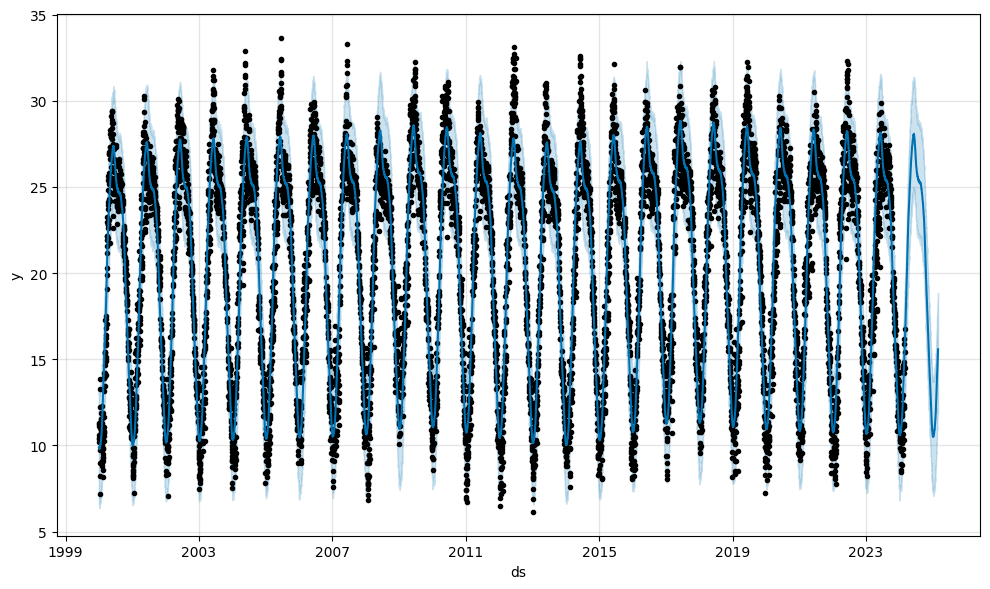

In [10]:
fig1 = m.plot(forecast)